In [1]:
# Import necessary modules

from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

import pathlib
import seaborn as sns
from sklearn import metrics

Using TensorFlow backend.


In [2]:
# Step 2 - Importing the dataset
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Step 3 - Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4907, 10)
(4907,)
(1636, 10)
(1636,)


In [5]:
model = Sequential()
model.add(Dense(150, input_dim=10, activation= "relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss= "binary_crossentropy" , optimizer="adam", metrics=["accuracy"])
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               1650      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 21,851
Trainable params: 21,851
Non-trainable params: 0
_________________________________________________________________


In [6]:
#model.fit(xtrain, ytrain, batch_size=512,epochs=5, verbose=1)

history = model.fit(X_train, y_train, batch_size = 128, epochs = 7, verbose = 1, validation_data = [X_test, y_test])



Train on 4907 samples, validate on 1636 samples
Epoch 1/7
4907/4907 [==============================] - 0s 75us/step - loss: 8.8968 - accuracy: 0.6287 - val_loss: 1.7419 - val_accuracy: 0.7714
Epoch 2/7
4907/4907 [==============================] - 0s 20us/step - loss: 2.2550 - accuracy: 0.6982 - val_loss: 0.7267 - val_accuracy: 0.7506
Epoch 3/7
4907/4907 [==============================] - 0s 19us/step - loss: 2.0818 - accuracy: 0.7141 - val_loss: 3.5128 - val_accuracy: 0.4340
Epoch 4/7
4907/4907 [==============================] - 0s 19us/step - loss: 1.3149 - accuracy: 0.7188 - val_loss: 1.0663 - val_accuracy: 0.6803
Epoch 5/7
4907/4907 [==============================] - 0s 20us/step - loss: 2.9371 - accuracy: 0.6637 - val_loss: 2.0004 - val_accuracy: 0.6687
Epoch 6/7
4907/4907 [==============================] - 0s 20us/step - loss: 1.5263 - accuracy: 0.7453 - val_loss: 1.1860 - val_accuracy: 0.7714
Epoch 7/7
4907/4907 [==============================] - 0s 20us/step - loss: 1.4845 - ac

In [7]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_accuracy,loss,accuracy,epoch
2,3.512798,0.433985,2.081817,0.714082,2
3,1.066281,0.680318,1.314934,0.718769,3
4,2.000417,0.668704,2.937117,0.663746,4
5,1.185985,0.771394,1.526308,0.745262,5
6,2.604098,0.771394,1.484536,0.716120,6


In [8]:
# Visualize history variables
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

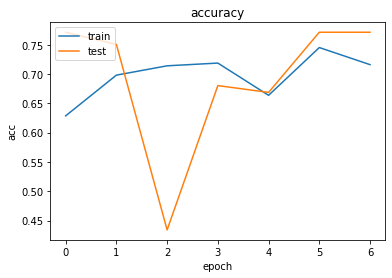

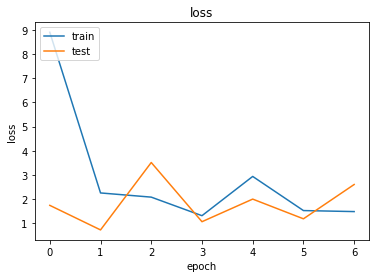

In [9]:
# summarize history for mean_squared_error
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for mean_absolute_error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Test Analysis Result


In [10]:
y_pred = model.predict(X_test)

In [11]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('')
print('R^2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.23710186843257078

Mean Squared Error: 0.22654217258857648

Root Mean Squared Error: 0.4759644656784543

R^2 Score: -0.2846496494924331


## Save test result to disk

In [12]:
test_results = np.array(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

test_results.shape

In [15]:
import xlsxwriter 
  
workbook = xlsxwriter.Workbook('test_result.xlsx') 

worksheet = workbook.add_worksheet("My sheet") 

row = 0
col = 0
  
for my_pred, true_pred in (test_results): 
    worksheet.write(row, col, my_pred) 
    worksheet.write(row, col + 1, true_pred) 
    row += 1

workbook.close() 